<a href="https://colab.research.google.com/github/ashutoshb206/Duplicate_Question-pair_Quora/blob/main/BOW_basic_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
try:
    with open('/content/train3.csv', 'r') as f:
        for i in range(10): # Read the first 10 lines
            line = f.readline()
            print(f"Line {i+1}: {line.strip()}")
except Exception as e:
    print(f"Error reading file: {e}")

Line 1: "id","qid1","qid2","question1","question2","is_duplicate"
Line 2: "0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
Line 3: "1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
Line 4: "2","5","6","How can I increase the speed of my internet connection while using a VPN?","How can Internet speed be increased by hacking through DNS?","0"
Line 5: "3","7","8","Why am I mentally very lonely? How can I solve it?","Find the remainder when [math]23^{24}[/math] is divided by 24,23?","0"
Line 6: "4","9","10","Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?","Which fish would survive in salt water?","0"
Line 7: "5","11","12","Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?","I'm a triple Capricorn (Sun, Moon and ascendant

In [6]:
try:
    with open('/content/train3.csv', 'r') as f:
        for i, line in enumerate(f):
            if i >= 27250 and i <= 27260: # Check lines around the error row
                 print(f"Line {i+1}: {line.strip()}")
            if i > 27260:
                break # Stop after checking the relevant lines
except Exception as e:
    print(f"Error reading file: {e}")

Line 27251: "27247","50634","4100","Is there any way I can train myself to cultivate interest or develop passion for programming?","How can I stop worrying about what other people think?","0"
Line 27252: "27248","50635","10016","What is the best way to learn guitar without taking classes?","How do I learn playing guitar without formal training?","1"
Line 27253: "27249","2327","1830","Why do some Indian Muslims hate Narendra Modi?","Why Muslims hate Modi government?","1"
Line 27254: "27250","50636","50637","How would earth be different if there's no moon?","Would there be life on the Earth without the moon?","1"
Line 27255: "27251","50638","50639","Can I use my Xbox 360 Kinect sensor on an Xbox One?","Do Xbox One and PS4 have different graphics?","0"
Line 27256: "27252","50640","50641","Will my check engine light make me fail my driver's license test?","How do you clear a check engine light on a Toyota Corolla?","0"
Line 27257: "27253","50642","50643","Dating and Relationships: Shall I 

In [8]:
df = pd.read_csv('/content/train3.csv')

In [9]:
df.shape

(404290, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [11]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [14]:
new_df = df.sample(40000,random_state=2)

In [15]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [18]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    25278
1    14722
Name: count, dtype: int64
is_duplicate
0    63.195
1    36.805
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

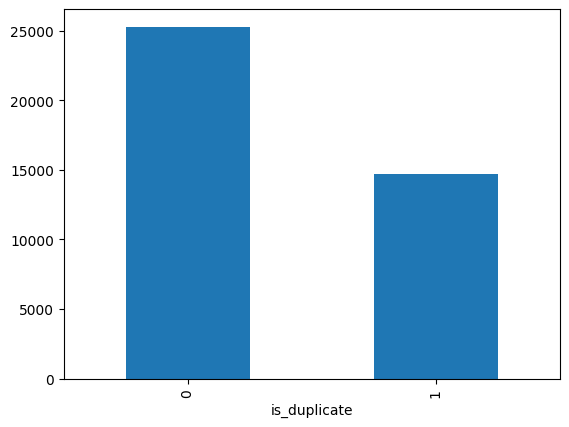

In [21]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [23]:
#repeated questions
qid = pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print("Number of unique qs" , np.unique(qid).shape[0])
x= qid.value_counts()>1
print("Number of questions getting repeated",x[x].shape[0])

Number of unique qs 72404
Number of questions getting repeated 5298


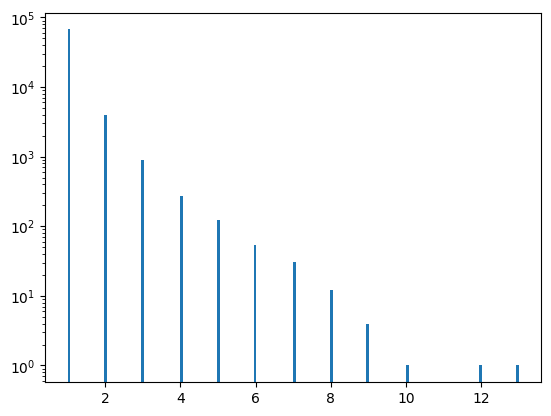

In [24]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

**Feature Engineering**

In [28]:
# creating new features
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [32]:
# number of words in question
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [33]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [34]:
new_df['word_common'] = new_df.apply(common_words,axis =1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [35]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [36]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [40]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


**ALL FEATURES CREATED, FEATURE ENGINEERING DONE**


**NOW ANALYSIS OF FEATURES**

In [41]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


The minimum len of question is:  1
The maximum len of question is:  391
The average len of question is:  59.58175


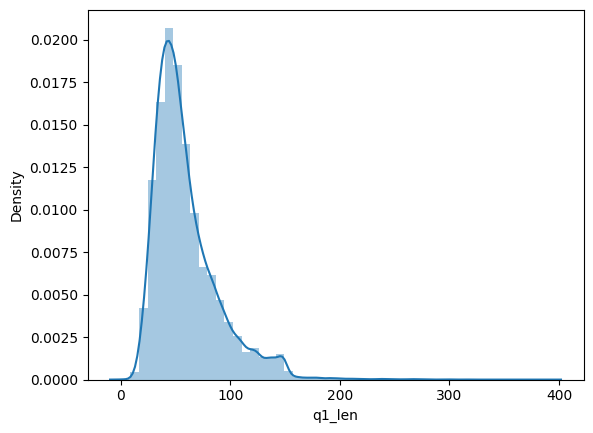

In [49]:
# Q1 Length
sns.distplot(new_df['q1_len'])
print("The minimum len of question is: ",new_df['q1_len'].min())
print("The maximum len of question is: ",new_df['q1_len'].max())
print("The average len of question is: ",new_df['q1_len'].mean()) #can convert into int also

The minimum len of question is:  6
The maximum len of question is:  1151
The average len of question is:  60.1391


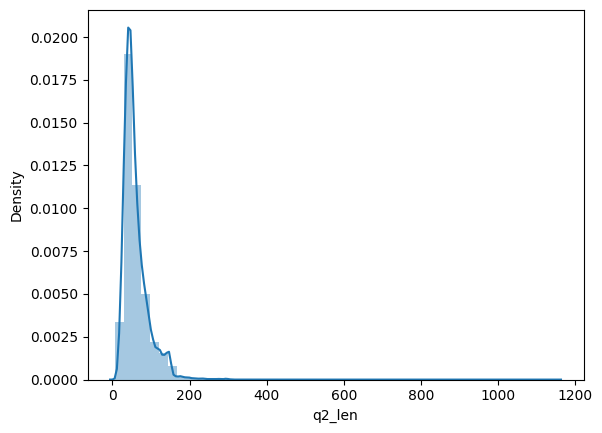

In [55]:
# Q2 Length
sns.distplot(new_df['q2_len'])
print("The minimum len of question is: ",new_df['q2_len'].min())
print("The maximum len of question is: ",new_df['q2_len'].max())
print("The average len of question is: ",new_df['q2_len'].mean()) #can convert into int also

The minimum num of words is:  1
The maximum num of words is:  72
The average num of words is:  10.950475


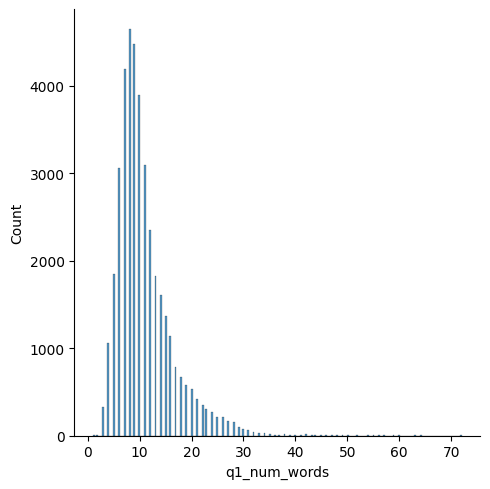

In [53]:
sns.displot(new_df['q1_num_words']) #can create either distplot or displot
print("The minimum num of words is: ",new_df['q1_num_words'].min())
print("The maximum num of words is: ",new_df['q1_num_words'].max())
print("The average num of words is: ",new_df['q1_num_words'].mean()) #can convert into int also

The minimum num of words is:  1
The maximum num of words is:  237
The average num of words is:  11.19765


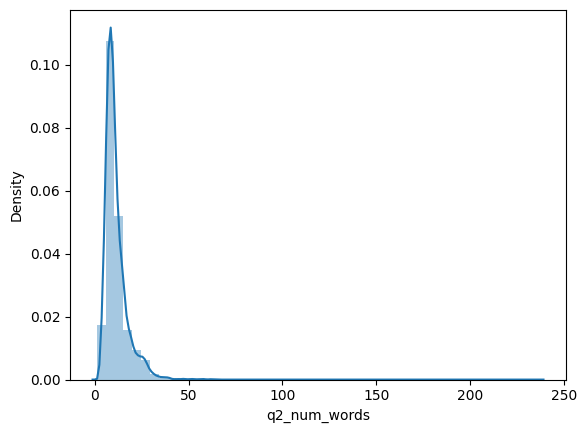

In [57]:
sns.distplot(new_df['q2_num_words']) #can create either distplot or displot
print("The minimum num of words is: ",new_df['q2_num_words'].min())
print("The maximum num of words is: ",new_df['q2_num_words'].max())
print("The average num of words is: ",new_df['q2_num_words'].mean()) #can convert into int also

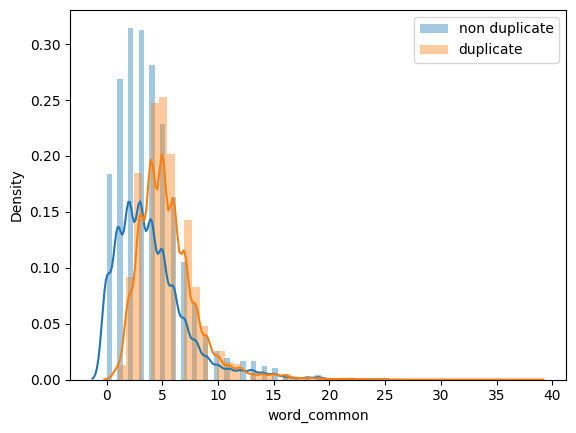

In [60]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

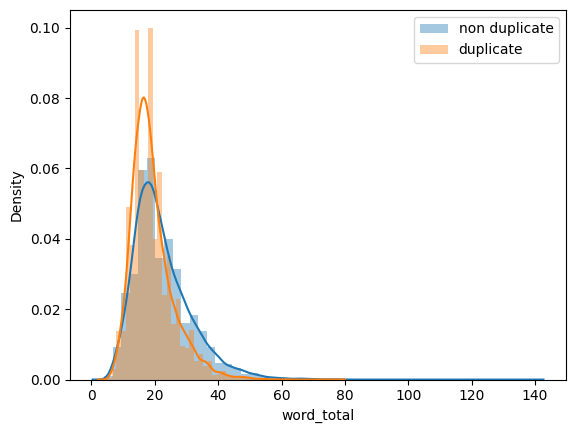

In [61]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

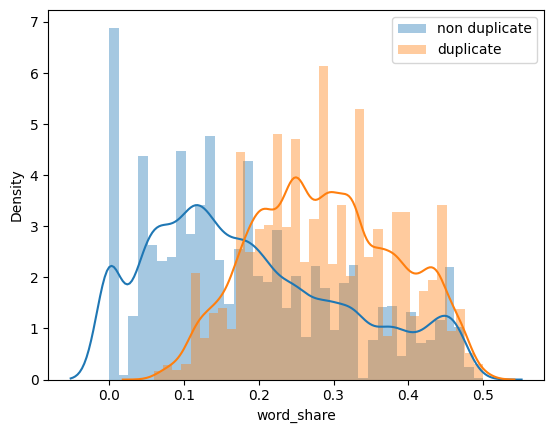

In [62]:
#word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label = 'duplicate')
plt.legend()
plt.show()

In [63]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [64]:
# keeping only the new created features in the final_df
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions = list(ques_df['question1'])+list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [68]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(40000, 6000)

In [69]:
# merging final_df and temp_df
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(40000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size = 0.2,random_state=1)

In [71]:
# using randomforest classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.78075

In [74]:
# using XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.776

In [ ]:
## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy